# LDA MODELLING FOR ALL DATA

In [1]:
# Import Packages
from imp import reload
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tool_functions import *
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
nltk.download('punkt')

/home/kyle/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /home/kyle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Extraction

In [6]:
funding = MySQLPipline(database='funding')

In [ ]:
NSFdata = funding.NSFDataset()
NSFdata["institution"] = ["NSF"] * NSFdata.shape[0]
NIHdata = funding.NIHDataset()
NIHdata["institution"] = ["NIH"] * NIHdata.shape[0]
ERCdata = funding.ERCDataset()
ERCdata["institution"] = ["ERC"] * ERCdata.shape[0]
UKRIdata = funding.UKRIDataset()
UKRIdata["institution"] = ["UKRI"] * UKRIdata.shape[0]

In [ ]:
funding.close_Conn()

In [ ]:
df1 = pd.concat([NIHdata[["title", "abstract", "institution"]],
                ERCdata[["title", "abstract", "institution"]]])
df2 = pd.concat([NSFdata[["title", "abstract", "institution"]],
                UKRIdata[["title", "abstract", "institution"]]])
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)

In [2]:
df = pd.read_csv("../Data/unified_data.csv")

In [3]:
df = df[~pd.isna(df['abstract'])]

# Data Processing

In [4]:
pp = preprocessor(dataset = df)

In [5]:
pp.remove_abstract(regex=r'Abstracts are not currently available in GtR').reset_index(drop = True, inplace = True)
pp.remove_abstract(regex=r'No abstract available').reset_index(drop = True, inplace = True)

In [6]:
pp.dataset = pp.dataset[~pd.isna(pp.dataset.title)]
pp.reset_index()

In [7]:
pp.clean_text()

This may take long time to run...
Starting to stem the abstracts...
Finished! It takes 1353.565544128418 seconds to run, stemming takes 1286.2443940639496 seconds to run.


,title,abstract,institution,stemmed
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH,project descript abstract dri eye diseas ded a...
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH,chimer antigen receptor car t cell therapi ha ...
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,project summari the icahn school of medicin at...
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH,while immunotherapi have made stride in the tr...
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH,project summari abstract thi new program proje...
...,...,...,...,...
173199,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,thi project is the first to systemat appli mod...
173200,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI,the may earthquak in sichuan provinc china had...
173201,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI,thi studi examin how patient and dentist decid...
173202,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,thi award cover the capit cost of procur a tfl...


In [8]:
pp.reset_index()

In [9]:
df_cleaned = pp.dataset
%store df_cleaned

Stored 'df_cleaned' (DataFrame)


In [10]:
pp.dataset.to_csv("../Data/cleanData.csv", index = False)

In [2]:
df_cleaned = pd.read_csv("../Data/cleanData.csv")

In [3]:
df_cleaned

,title,abstract,institution,stemmed
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH,project descript abstract dri eye diseas ded a...
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH,chimer antigen receptor car t cell therapi ha ...
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,project summari the icahn school of medicin at...
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH,while immunotherapi have made stride in the tr...
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH,project summari abstract thi new program proje...
...,...,...,...,...
173199,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,thi project is the first to systemat appli mod...
173200,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI,the may earthquak in sichuan provinc china had...
173201,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI,thi studi examin how patient and dentist decid...
173202,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,thi award cover the capit cost of procur a tfl...


# LDA Model Creating

In [4]:
# %store -r df_cleaned
pp = preprocessor(dataset = df_cleaned)

In [5]:
pp.colname = 'stemmed'

In [6]:
pp.remove_stop_words()

Finished! It takes 13.386025667190552 seconds to run.


,title,abstract,institution,stemmed,corpus
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH,project descript abstract dri eye diseas ded a...,"[dri, eye, diseas, ded, ocular, surfac, diseas..."
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH,chimer antigen receptor car t cell therapi ha ...,"[chimer, antigen, receptor, car, cell, therapi..."
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,project summari the icahn school of medicin at...,"[icahn, school, medicin, mount, sinai, cancer,..."
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH,while immunotherapi have made stride in the tr...,"[immunotherapi, stride, treatment, cancer, cas..."
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH,project summari abstract thi new program proje...,"[molecular, mechan, pathogenesi, bladder, canc..."
...,...,...,...,...,...
173199,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,thi project is the first to systemat appli mod...,"[systemat, modern, critic, theori, bodi, gende..."
173200,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI,the may earthquak in sichuan provinc china had...,"[earthquak, sichuan, provinc, magnitud, devast..."
173201,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI,thi studi examin how patient and dentist decid...,"[patient, dentist, treatment, involv, costli, ..."
173202,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,thi award cover the capit cost of procur a tfl...,"[capit, cost, procur, tflop, hpc, cluster, hos..."


In [ ]:
def 

In [7]:
df_noStopWords = pp.dataset
%store df_noStopWords

Stored 'df_noStopWords' (DataFrame)


# Stemming and Lemmatization

In [8]:
# %store -r df_noStopWords
# pp = nlp_ldamodel.preprocessor(dataset = df_noStopWords)

In [9]:
pp.reset_index()

In [10]:
# pp.word_stemmer(getSet = True)

In [11]:
# nsf = pp.dataset[pp.dataset["institution"] == 'NSF']

In [12]:
# nsf.iat[2,1]

In [14]:
all_corpus = pp.getAllCorpus(colname = 'corpus')

In [15]:
len(all_corpus)

32313281

In [16]:
len(set(all_corpus))

231191

# LDA Model Creation

In [17]:
# %store -r df_stemmed
# pp = nlp_ldamodel.preprocessor(dataset = df_stemmed)

In [19]:
words, dic, corpus = pp.get_corpus(colname = "corpus")

In [20]:
m = nlp_ldamodel(words, dic, corpus)

In [22]:
m.LDA_Model(18, 200)
results = m.LDA_Visualisation()

In [23]:
results

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.170128 -0.033498       1        1  14.504703
11    -0.211146  0.081667       2        1  13.037573
8     -0.077289  0.048682       3        1   7.497183
4     -0.186146  0.043494       4        1   7.225948
17     0.116800 -0.169526       5        1   6.482458
10     0.000804 -0.113921       6        1   6.372485
6     -0.045451 -0.079432       7        1   6.135119
14     0.131650 -0.058329       8        1   5.706902
5     -0.132542  0.007536       9        1   5.023389
3     -0.036632 -0.094428      10        1   5.003648
0      0.152305 -0.128485      11        1   4.903448
13    -0.072198  0.014548      12        1   4.199591
7     -0.174502  0.157633      13        1   3.693414
16     0.028729 -0.066138      14        1   3.239899
9      0.087010 -0.078691      15        1   2.918804
1      0.181573  0.014501      16        1   1.868509
15     0.181352  0.077837      17        1   1.675963
12     0.225810  0.376550      18        1   0.510964, topic_info=          Term           Freq          Total Category  logprob  loglift
93        cell  389577.000000  389577.000000  Default  30.0000  30.0000
542    protein  182350.000000  182350.000000  Default  29.0000  29.0000
671     health   88448.000000   88448.000000  Default  28.0000  28.0000
130       gene  108121.000000  108121.000000  Default  27.0000  27.0000
14      diseas  151356.000000  151356.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
5120    mammal    1668.390155    5733.696929  Topic18  -4.5947   4.0421
1523        ad    2116.122968   13390.346395  Topic18  -4.3570   3.4317
4767  scaffold    1395.814971    3634.032716  Topic18  -4.7731   4.3198
2931    vehicl    1618.918372    9683.387019  Topic18  -4.6248   3.4880
512      tissu    1802.427246   55700.506043  Topic18  -4.5175   1.8458

[1393 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10768      1  0.998632  abroad
11479     13  0.997158     acc
1342       1  0.158713  access
1342       2  0.332453  access
1342       3  0.008665  access
...      ...       ...     ...
3681       9  0.033334    zone
3681      11  0.001833    zone
3681      14  0.034021    zone
3681      15  0.611460    zone
3681      17  0.001031    zone

[6158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 12, 9, 5, 18, 11, 7, 15, 6, 4, 1, 14, 8, 17, 10, 2, 16, 13])

In [24]:
themes = [
    "",
    "Education",
    "Biomedical Engineer",
    "Social Science and Welfare",
    "Protein Structure",
    "Brain Structure and Disease (Nuroscience)",
    "Physics and Chemistry",
    "Immunology",
    "Sensor Technology",
    "Population Genetics",
    "Pathology",
    "Climate Change and Environment",
    "Public Health",
    "Microbiology",
    "",
    "",
    "",
    ""]

In [25]:
len(themes)

17

In [69]:
# themes = [
#     "graduate education",
#     "sensor techonology",
#     "Economics"
#     "immunology",
#     "materials science",
#     "universal field theory (phyics)",
#     "Protein Structure",
#     "population genetics",
#     "brain structure and disease",
#     "heart disease",
#     "social science and welfare",
#     "environmental policy",
#     "health / oncology",
#     "Epidemiology",
#     "carbon markets",
#     "soil biology",
# ]

In [72]:
m.add_themes(themes=themes)

# LDA Model Prediction

In [73]:
#  predicting new text which is in text dataframe  
unseen_abstract = """
MAP aims to provide a comparative approach on the use of interdisciplinary arts-based practices for peacebuilding in Kyrgyzstan, Rwanda, Indonesia and Nepal. 
MAP has the overall goals of first, influencing curricula and approaches to working with in- and out-of-school youth and second, creating structures and modes of 
communication between youth and policymakers from the local to global. Each country has different histories and approaches to peacebuilding, yet all four have a 
rich tradition of using cultural forms for dialogue. The selection of the four countries will enable us to explore how pathways to peace may be shaped by diverse 
political, cultural, religious and linguistic factors, as well as the crosscutting issues of gender and intersecting inequalities, environments and the exclusion 
of children and youth from policymaking processes. 

MAP will operate across three core components: a) project design and delivery; b) research; and c) arts-based practice that run throughout three strands of activities. 
Strand One will involve scoping visits, literature reviews, community mapping and training of adult and child/youth facilitators in arts-based methods for dialogue and research.
During Strand Two, up to 3 small grants of &amp;pound;5,000 will be awarded in each of the four countries for child/youth and adult MAP trainers to work alongside CSOs to 
develop projects that address local issues that may incorporate (but are not limited to): child rights-based decision-making; child protection and peacebuilding. 
Up to 2 grants of &amp;pound;29,500 in each of the four countries for youth to work alongside policy-focused organisations to explore arts-based communication structures. 
Up to 4 large grants of &amp;pound;100,000 in each of the four countries for researchers of any level and partnering organisations to design and deliver effective monitoring, 
evaluation and impact delivery alongside the small and mid-size grant awardees. One additional large grant of &amp;pound;100,000 will be awarded in the final two years of the 
project to synthesize findings, drawing out similarities and divergences across the four countries and to consider questions of scalability and transferability, in order to 
inform youth policy at an international level. Strand Three will involve the coordination of community-based dialogue groups and MAP Clubs to inform policy and establish 
communication structures alongside synthesis and dissemination. The project will be working alongside cultural organisations, youth-serving CSOs, conflict and peace building 
CSOs, government institutions and ministries, higher education institutions, conflict management, and psychosocial wellbeing organisations. In this way, the project promises 
diverse impact at local, national and international levels. 

We will explore the following questions:

1. How can different art forms be used to co-design, deliver and evaluate peacebuilding curricula and other approaches for working with children and youth to address local conflict issues?
2. How might cultural forms be used for dialogue with and between children and youth, educators and policy makers to advance peacebuilding through a local and indigenous approach?
3. How might psychosocial support, including local healing practices, be better integrated within peacebuilding approaches by using the arts to promote the wellbeing of children and youth, especially 
those from marginalised groups? 
4. How can cultural forms be incorporated into child- and youth-led participatory action research methodologies and adapted for the purposes of the design, undertaking and delivery of interdisciplinary 
projects in diverse social, political and cultural contexts?
5. How might these cultural forms be used to create alternative spaces and communication structures for peacebuilding approaches and curricula development to inform local, national and international approaches to peacebuilding.
"""

In [75]:
m.topic_prediction(unseen_abstract)

IndexError: list index out of range

# Terms Filter

In [6]:
def get_tfidf(docList):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(docList)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    tfidf = pd.DataFrame(denselist, columns=feature_names)
    return tfidf

In [18]:
# unimpWords1 = []
# for word in tqdm(list(set(all_corpus))[0:80000]):
#     occur = mp.getWordOccurance(word)
#     if occur < 0.001 or occur > 0.8:
#         unimpWords1.append(word)

100%|███████████████████████████████████| 80000/80000 [5:44:58<00:00,  3.86it/s]


In [19]:
# %store unimpWords1

Stored 'unimpWords1' (list)


In [ ]:
# %store -r unimpWords2
# %store -r unimpWords3

# Topic Selection

In [11]:
def topicSelectionPlot(docNumber = [1,2,12,13,23,24,34,35]):
    fig, ax = plt.subplots(figsize=(15, 10))
    for elem in docNumber:
        grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
        ax.plot(grid.num_topics, grid.c_v)
        ax.scatter(grid.num_topics, grid.c_v)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Number of Topic', fontsize=16)
    ax.set_ylabel("C_V value", fontsize=16)

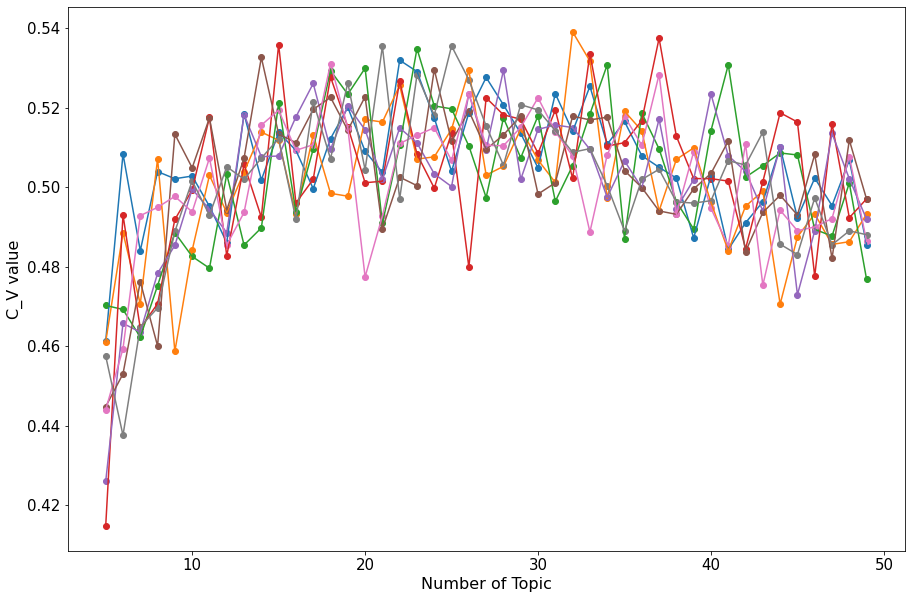

In [12]:
topicSelectionPlot()

In [13]:
def avgTopicSelectionPlot(docNumber = [26, 80, 189, 204, 238, 239, 254, 257]):
    CVs = np.array([0] * 45)
    for elem in docNumber:
        grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
        CVs = CVs + np.array(grid.c_v)
    Avg_CVs = CVs / np.array([len(docNumber)] * 45)
    print(str(np.argmax(Avg_CVs) + 5) + ":" + str(np.max(Avg_CVs)))
    plt.figure(figsize=(15, 10))
    plt.plot(range(5,50), Avg_CVs)
    plt.scatter(range(5,50), Avg_CVs)
    plt.tick_params(axis='both', labelsize=15)
    plt.xlabel('Number of Topic', fontsize = 16)
    plt.ylabel('C_V value', fontsize = 16)
    plt.title('Total Probability of Top 10 Words in each Topic', fontsize = 16)

18:0.517241595161497


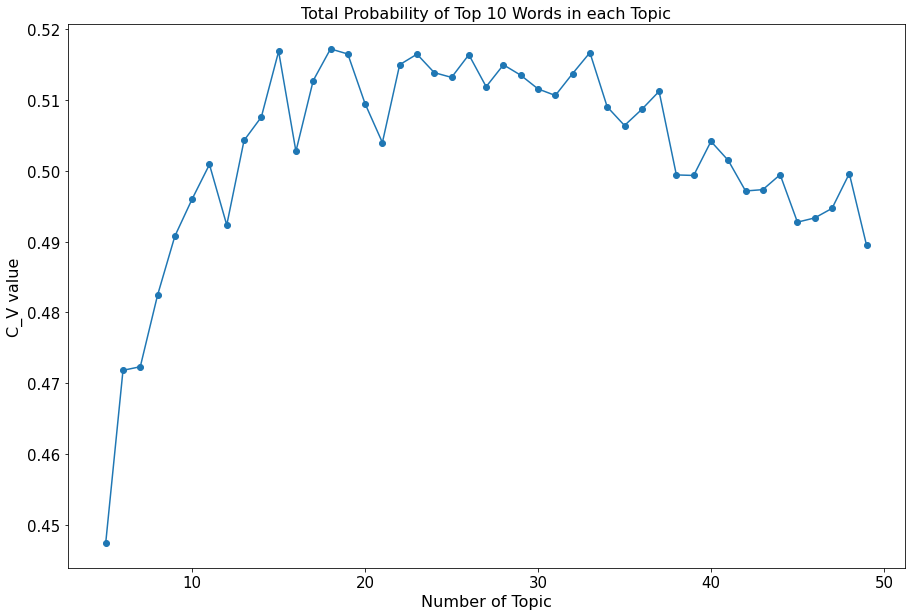

In [15]:
avgTopicSelectionPlot(docNumber = [1,2,12,13,23,24,34,35])